# Analísis exploratorio de los datos

## Importación de dependencias y de los conjuntos de datos

In [82]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import wordcloud

In [83]:
coursera_courses = pd.read_csv("../data/raw/Coursera_courses.csv")
coursera_reviews = pd.read_csv("../data/raw/Coursera_reviews.csv")
edx_courses = pd.read_csv("../data/raw/edx_courses.csv")
udemy_courses = pd.read_csv("../data/raw/udemy_courses.csv")
plt.rcParams["font.family"] = "Calibri"

## Analísis de cursos de Coursera

Coursera[[0]](#0) es un proveedor de MOOCs estadounidense fundado en 2012, con una visión de "proveer experiencias de aprendizaje que transformen las vidas de estudiantes alrededor del mundo". Actualmente, en su propio sitio, afirman que colaboran con más de 275 universidades y compañías para ofrecer una variedad de oportunidades educativas, las cuales analizaremos a continuación en 2 datasets:

* coursera_courses: Contiene información acerca de 623 cursos, con el enlace y la institución asociado a cada uno de ellos.
* coursera_reviews: Contiene datos sobre las reseñas en el propio sitio de Coursera de cada uno de los cursos del dataset anterior.

Para empezar, harémos un dataframe que junte la información dada en coursera_courses con un promedio del rating dado a los cursos en coursera_reviews y la cantidad de reseñas por cada uno de ellos, para darnos una idea general acerca de cuales disfrutan de una mayor popularidad, de cuales instituciones provienen, y de que tipo de temas tratan.

<a id="0">[0]</a> Coursera's Mission, Vision, and Commitment to our Community https://about.coursera.org/

In [84]:
coursera_courses.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [85]:
coursera_reviews.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


En ambos csv hace falta información. Podemos obviar el contenido de las reseñas y el nombre de los reseñadores por el momento, ya que al ser cadenas largas van a ser datos bastante complejos de analizar, y no son relevantes a nuestro problema.

Queremos saber a partir del campo rating cuales son los cursos con mayor numeros de reseñas (los cuales podemos interpretar como que serán aquellos más populares), y cuales son aquellos con el mayor rating promedio (los que terminan siendo de mayor interés para los usuarios de la plataforma).

In [86]:
avg_rtn = coursera_reviews.groupby(['course_id']).mean()['rating']
num_rtn = coursera_reviews.course_id.value_counts()
rtn_data = pd.concat([avg_rtn,num_rtn],axis=1).reset_index()
rtn_data.columns = ['course_id', 'average_rating', 'rating_count']
coursera_cnr = pd.merge(coursera_courses,rtn_data,on='course_id')

C:\Users\pukeboy71\AppData\Local\Temp\ipykernel_10964\1236129105.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_rtn = coursera_reviews.groupby(['course_id']).mean()['rating']


In [125]:
coursera_cnr.to_parquet('../data/processed/coursera_cnr.parquet')

#### Gráfica de ratings de Coursera

C:\Users\pukeboy71\AppData\Local\Temp\ipykernel_10964\1052773659.py:18: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


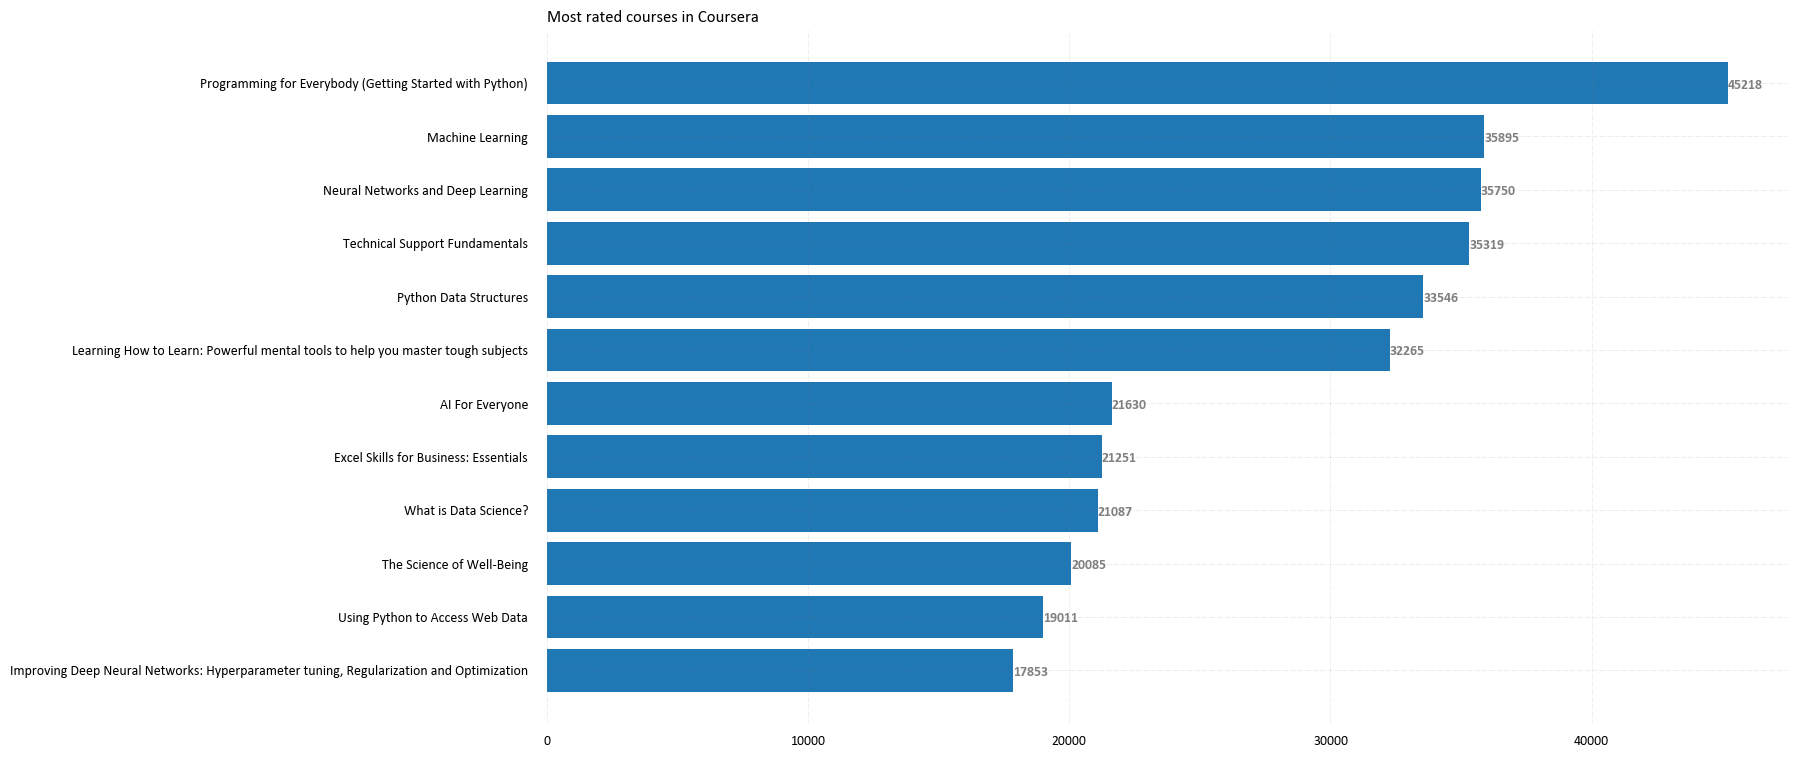

In [87]:
name = coursera_cnr.sort_values(by=['rating_count'],axis=0,ascending=False).name.head(12)
rtngs = coursera_cnr.sort_values(by=['rating_count'],axis=0,ascending=False).rating_count.head(12) 
fig, ax = plt.subplots(figsize = (16, 9))
ax.barh(name,rtngs)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
     
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Most rated courses in Coursera',
             loc ='left', )
 
# Show Plot
plt.show()

El anterior grafico nos muestra los 12 cursos con mayor numero de ratings en nuestro dataset. Como podemos ver, la mayoría de los cursos populares en Coursera tienen que ver con temás de informática, principalmente la inteligencia artíficial (4 de 12) y Python (3, aunque se puede asumir que los demás cursos lo usan también). Los cursos dirigidos a una audiencia de principiantes también disfrutan de bastante popularidad.

C:\Users\pukeboy71\AppData\Local\Temp\ipykernel_10964\2040099519.py:20: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


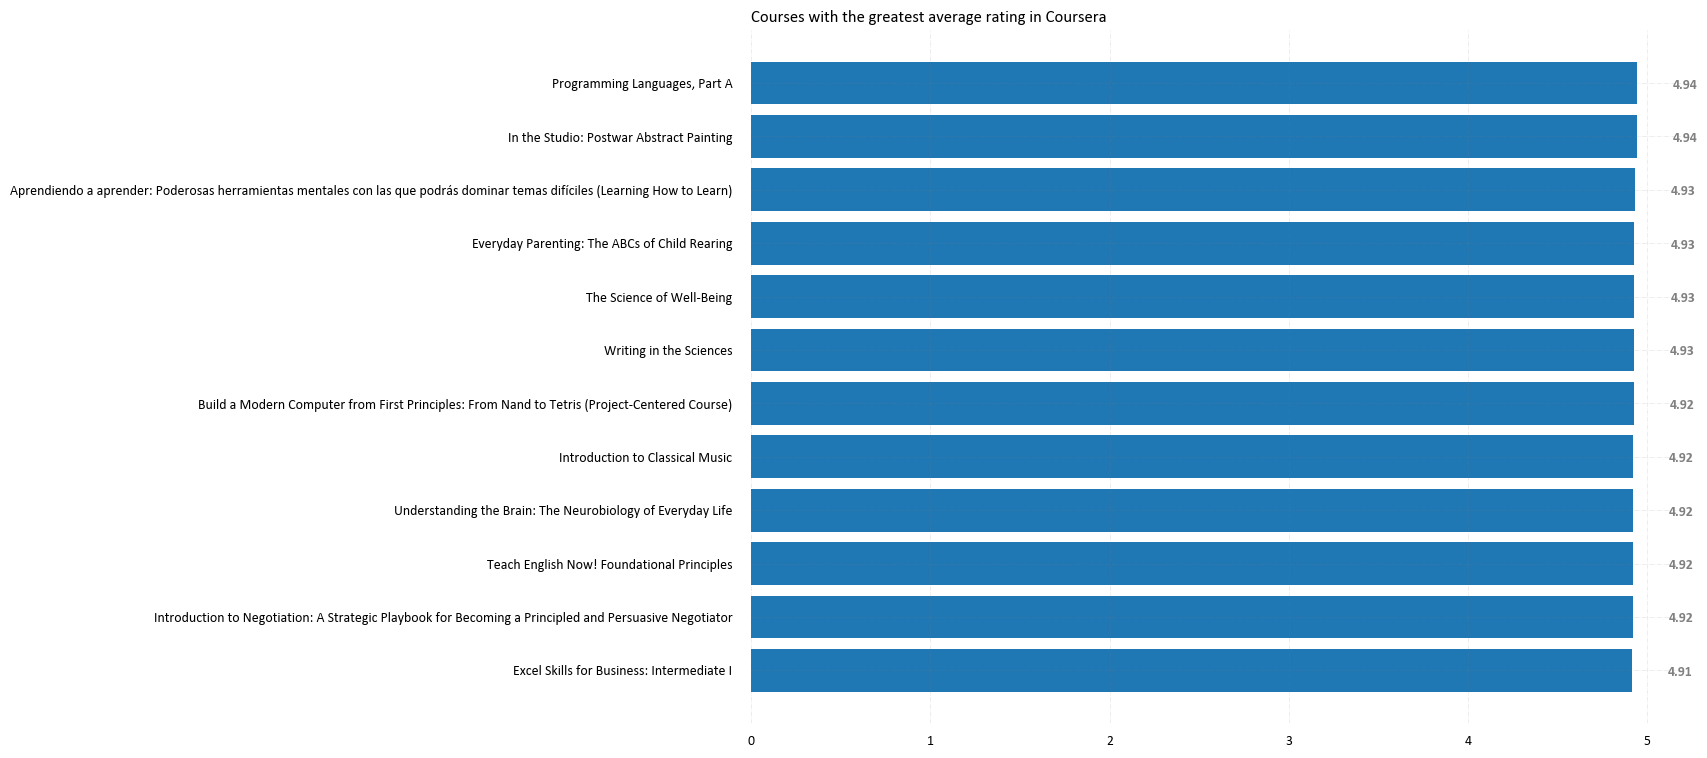

In [88]:
name = coursera_cnr[coursera_cnr.rating_count > 1000].sort_values(by=['average_rating'],axis=0,ascending=False).name.head(12)
avg_rating = coursera_cnr[coursera_cnr.rating_count > 1000].sort_values(by=['average_rating'],axis=0,ascending=False).average_rating.head(12) 
rtngs = coursera_cnr[coursera_cnr.rating_count > 1000].sort_values(by=['average_rating'],axis=0,ascending=False).rating_count.astype(str).head(12)

fig, ax = plt.subplots(figsize = (12, 9))
ax.barh(name,avg_rating)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
     
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Courses with the greatest average rating in Coursera',
             loc ='left', )
 
# Show Plot
plt.show()

Incluso después de filtrar por aquellos que tienen más de 1000 reviews, encontramos que hay una gran disparidad entre los topicos del anterior grafo y los de este: los unicos cursos que comparten son "Learning how to Learn" y "Excel Skills for Beginners: Intermediate I". Sugiere que hay un nicho importante de usuarios que disfrutan de cursos con topicos fuera de los más buscados.

#### Nube de palabras de titulos

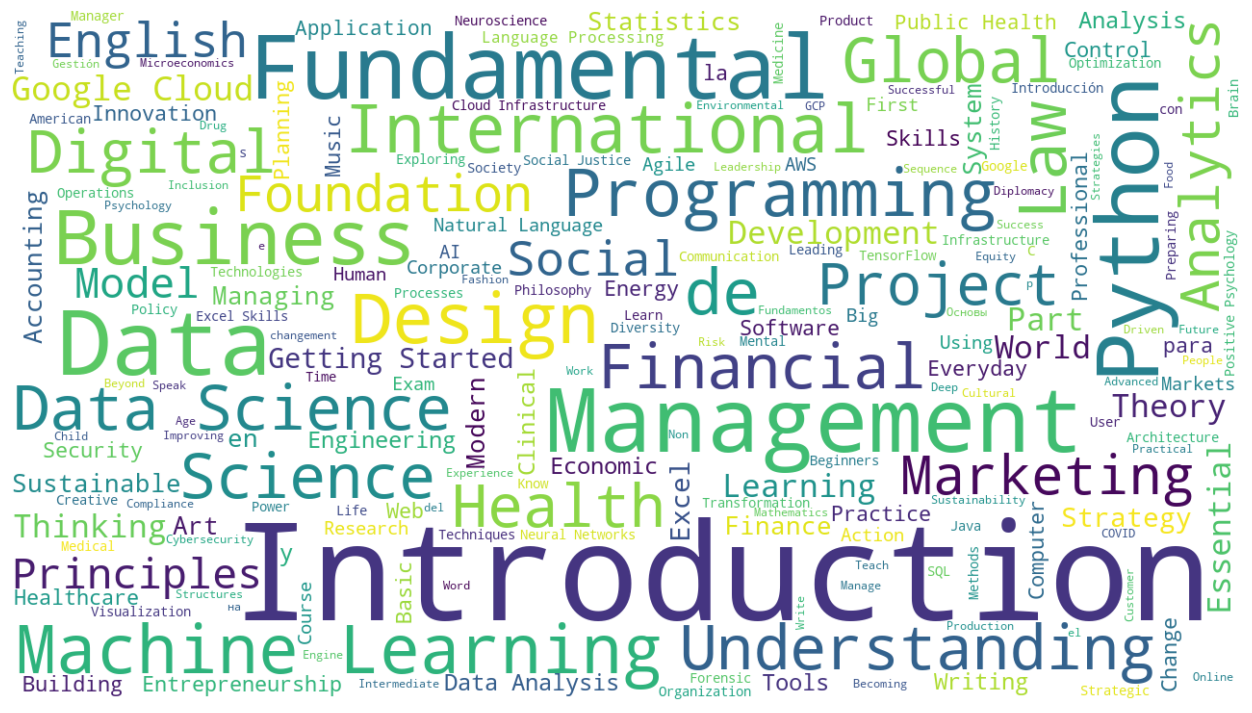

In [89]:
titles = " ".join(i for i in coursera_courses.name)
stopwords = set(wordcloud.STOPWORDS)
mywordcloud = wordcloud.WordCloud(width=1280,height=720,stopwords=stopwords, background_color="white").generate(titles)
plt.figure( figsize=(16,9))
plt.imshow(mywordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Tal como se refleja en los cursos que son más reseñados, se puede observar que la mayoría de los titulos tienen las palabras Machine Learning, Science, Python o Data: sin embargo, podemos observar que los cursos de Marketing, Management y Business, a pesar de ser casi igual de comunes, no están entre los cursos más reseñados o con mejores reseñas.

## Analísis de cursos de edX

edX[[1]](#1) es un proveedor de MOOCs creado por Harvard y MIT. Creado con el proposito de ofrecerle educación de alta calidad a cualquier persona que la desee, actualmente hospeda más de 3600 cursos con 42 millones de usuarios alrededor del mundo.

En los datos otorgados, tenemos el dataset edx-courses, el cual vamos a analizar a continuación:

<a id="1">[1]</a>https://www.edx.org/about-us About Us | edX

In [90]:
edx_courses.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


Todos los cursos ofrecidos por edX que estan almacenados en este dataset son gratis, pero la plataforma ofrece certificados pagos a los usuarios que los deseen.

In [91]:
edx_courses['n_enrolled'] = pd.to_numeric(edx_courses['n_enrolled'].str.replace(',', ''))
edx_courses[edx_courses.price.str.contains("FREE") == False]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url


Veamos cuales son los cursos con más estudiantes:

### Graficas de los tipos de cursos en edX

C:\Users\pukeboy71\AppData\Local\Temp\ipykernel_10964\711413136.py:18: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


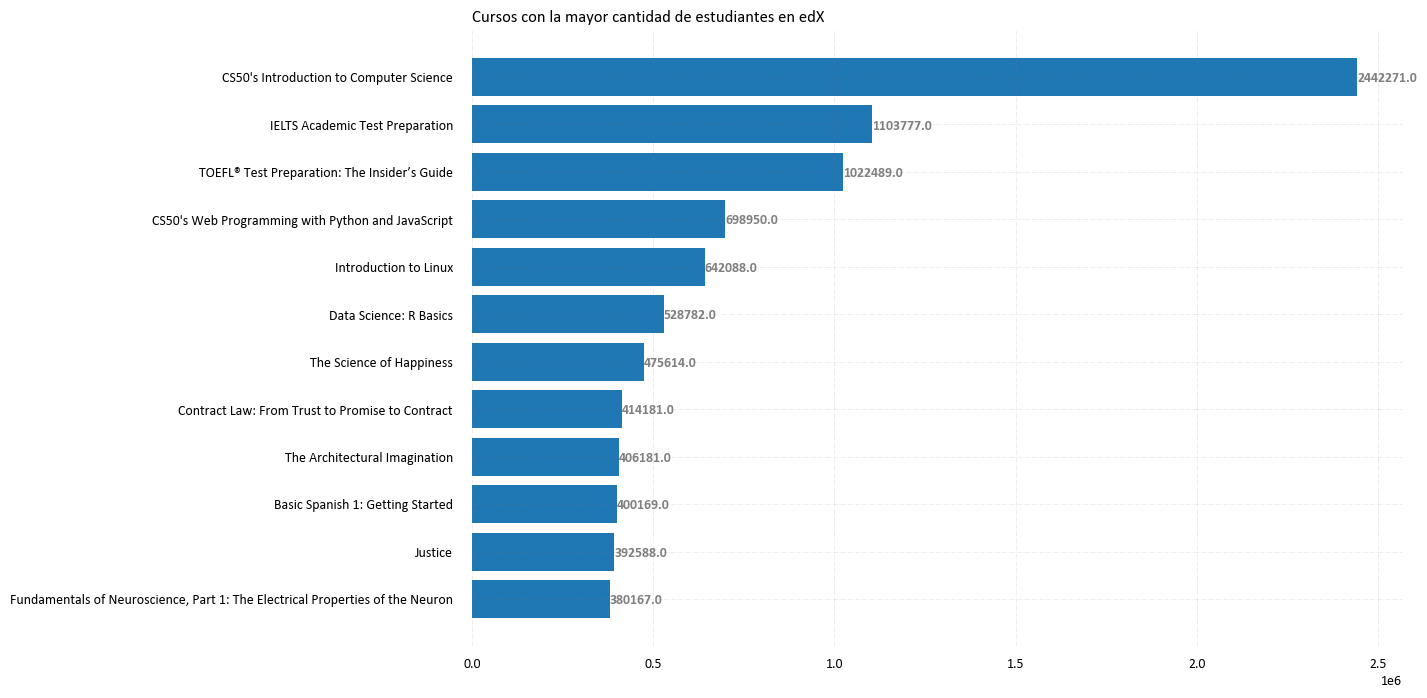

In [92]:
name = edx_courses.sort_values(by=['n_enrolled'],axis=0,ascending=False).title.head(12)
rtngs = edx_courses.sort_values(by=['n_enrolled'],axis=0,ascending=False).n_enrolled.head(12) 
fig, ax = plt.subplots(figsize = (12, 8))
ax.barh(name,rtngs)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
     
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Cursos con la mayor cantidad de estudiantes en edX',
             loc ='left', )
 
# Show Plot
plt.show()

Vemos que los cursos de CS50 se llevan por lejos la corona, estando 1 millon de estudiantes por delante del resto. Aparte de estos, tenemos dos test de preparación para inglés: el IELTS y el TOEFL, y un curso introductorio al español, además de un par de cursos legales.

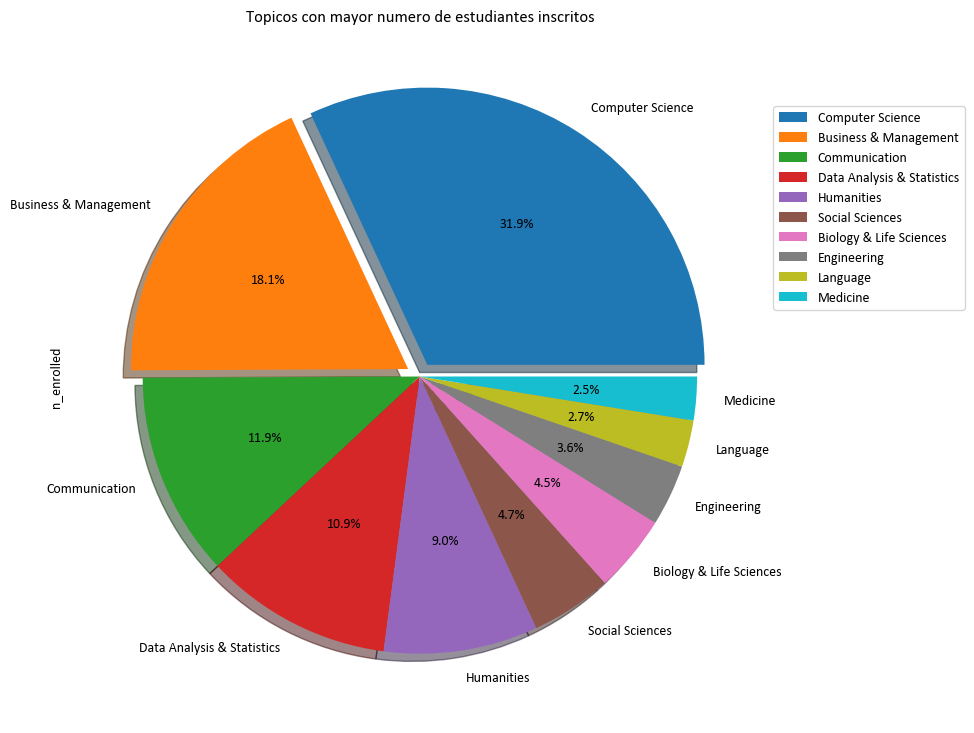

In [93]:
toptensubjects = edx_courses.groupby(by='subject').n_enrolled.sum().sort_values(ascending=False).head(10)
ax = toptensubjects.plot.pie(title="Topicos con mayor numero de estudiantes inscritos",figsize=(16,9),shadow=True, autopct='%1.1f%%', explode=[0.05,0.05,0,0,0,0,0,0,0,0], legend=True)
ax.legend(bbox_to_anchor=(1, 0.9), loc='upper left')

Sin embargo, al realizar un gráfico de torta que muestré los topicos de los cursos disponibles en edX según la cantidad de estudiantes que estén inscritos en ellos, nos damos cuenta que generalmente sigue siendo el mismo caso que en Coursera: Los cursos de informatica disfrutan de más participación, seguidos de cursos de negocios y comunicación. Podemos revisar proximamente cuales son los topicos que tienen más cursos: 

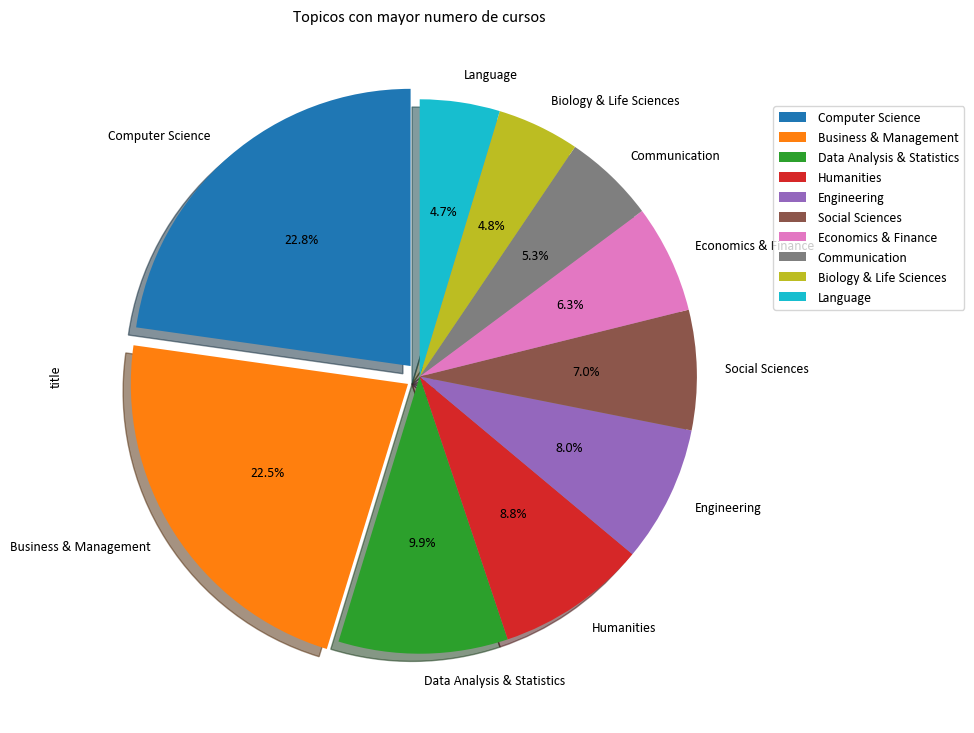

In [94]:
toptensubjects = edx_courses.groupby(by='subject').title.count().sort_values(ascending=False).head(10)
ax = toptensubjects.plot.pie(title="Topicos con mayor numero de cursos",startangle=90,figsize=(16,9),shadow=True, autopct='%1.1f%%', explode=[0.05,0.05,0,0,0,0,0,0,0,0], legend=True)
ax.legend(bbox_to_anchor=(1, 0.9), loc='upper left')

Por lo general, la cantidad de cursos por topico refleja la cantidad de alumnos inscritos en cada uno de ellos: sin embargo, vemos que los cursos de comunicación conforman una parte pequeña de la plataforma pese a disfrutar de una gran cantidad de usuarios, y que a pesar de estar presentes en misma proporción que los cursos de ciencias computacionales, los cursos de negocios y management tienen la mitad de sus usuarios (lo cual podría ser en gran parte gracías a CS50).

Veamos si el precio es un factor a la hora de los estudiantes decidir si se van a escribir:

### Gráficas según precio en edX

In [95]:
edx_courses['price'] = pd.to_numeric(edx_courses['price'].str.replace('[^0-9]',''))

C:\Users\pukeboy71\AppData\Local\Temp\ipykernel_10964\630371650.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  edx_courses['price'] = pd.to_numeric(edx_courses['price'].str.replace('[^0-9]',''))


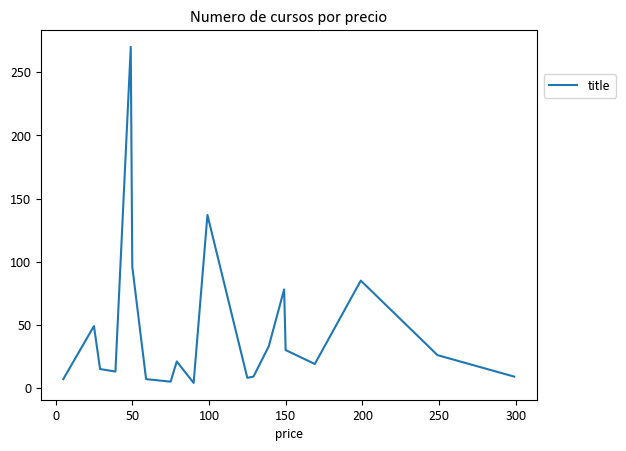

In [96]:
toptenbyprice = edx_courses.groupby(by='price').title.count().sort_values(ascending=False).head(20).sort_index()
ax = toptenbyprice.plot.line(title='Numero de cursos por precio')
ax.legend(bbox_to_anchor=(1, 0.9), loc='upper left')

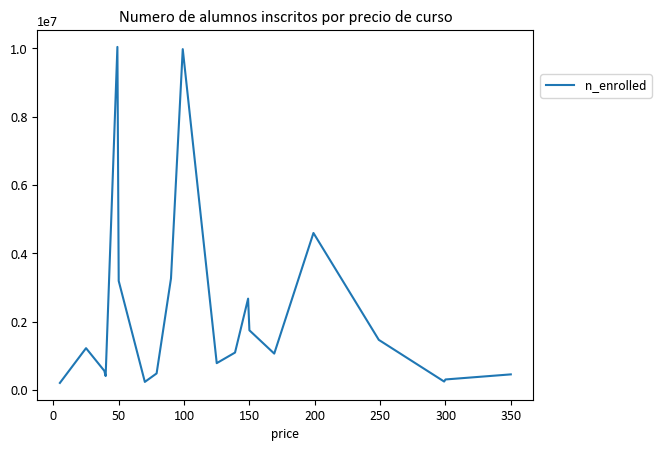

In [97]:
toptenbyprice = edx_courses.groupby(by='price').n_enrolled.sum().sort_values(ascending=False).head(20).sort_index()
ax = toptenbyprice.plot.line(title='Numero de alumnos inscritos por precio de curso')
ax.legend(bbox_to_anchor=(1, 0.9), loc='upper left')

Los anteriores graficos implican que la mayoría está dispuesta a pagar por la certificación de sus cursos solamente si se encuentran entre el rango de precio de 0 a 100 dolares, y que aquellos que están justo en el punto dulce de cobrar 100$ por su certificado disfrutan de más popularidad, a pesar de ser menos. Analizemos si tendrá que ver con los cursos ofrecidos en los distintos rangos de precios:

C:\Users\pukeboy71\AppData\Local\Temp\ipykernel_10964\2705647904.py:20: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',
c:\Users\pukeboy71\Documents\Henry-PI\moocDashboard\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35821 (\N{CJK UNIFIED IDEOGRAPH-8BED}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\pukeboy71\Documents\Henry-PI\moocDashboard\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35828 (\N{CJK UNIFIED IDEOGRAPH-8BF4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


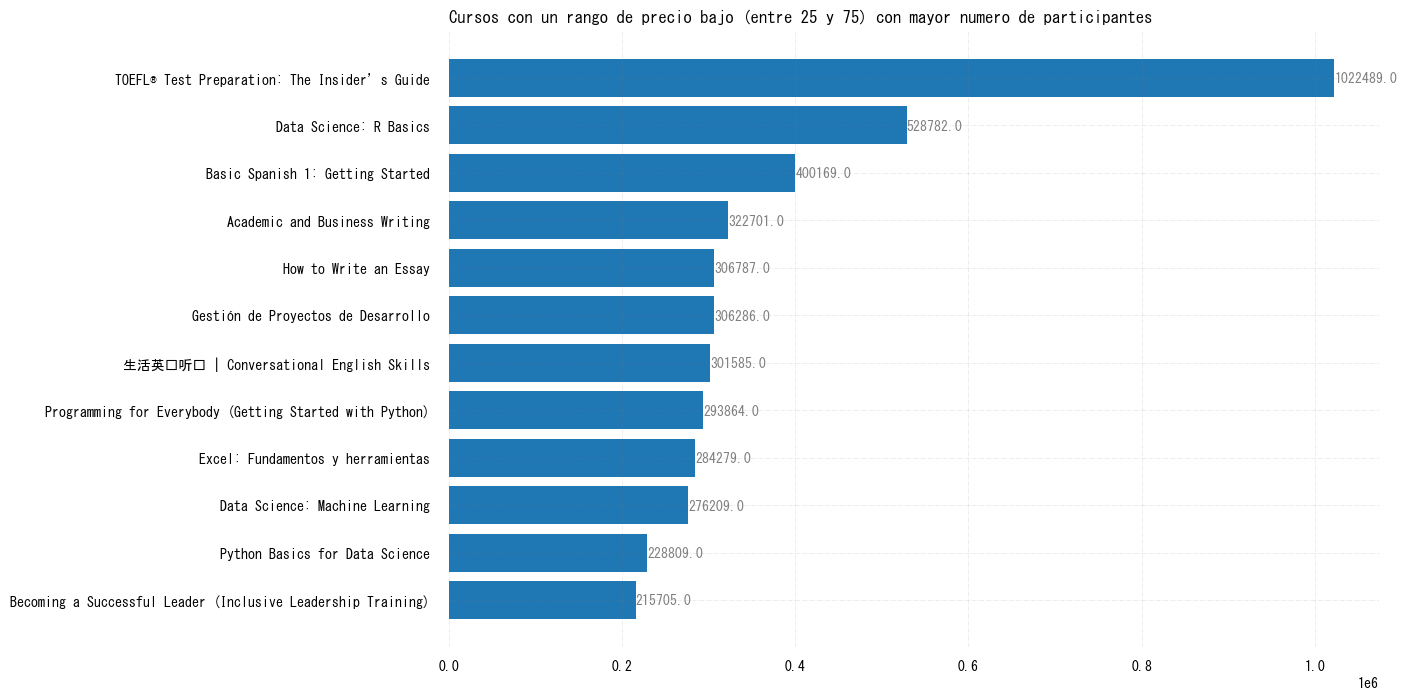

In [98]:
plt.rcParams["font.family"] = "MS Gothic"
name = edx_courses[(edx_courses.price > 25) & (edx_courses.price < 75)].sort_values(by=['n_enrolled'],axis=0,ascending=False).title.head(12)
rtngs = edx_courses[(edx_courses.price > 25) & (edx_courses.price < 75)].sort_values(by=['n_enrolled'],axis=0,ascending=False).n_enrolled.head(12) 
fig, ax = plt.subplots(figsize = (12, 8))
ax.barh(name,rtngs)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)


# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Cursos con un rango de precio bajo (entre 25 y 75) con mayor numero de participantes',
             loc ='left', )
 
# Show Plot
plt.show()

C:\Users\pukeboy71\AppData\Local\Temp\ipykernel_10964\581609679.py:19: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


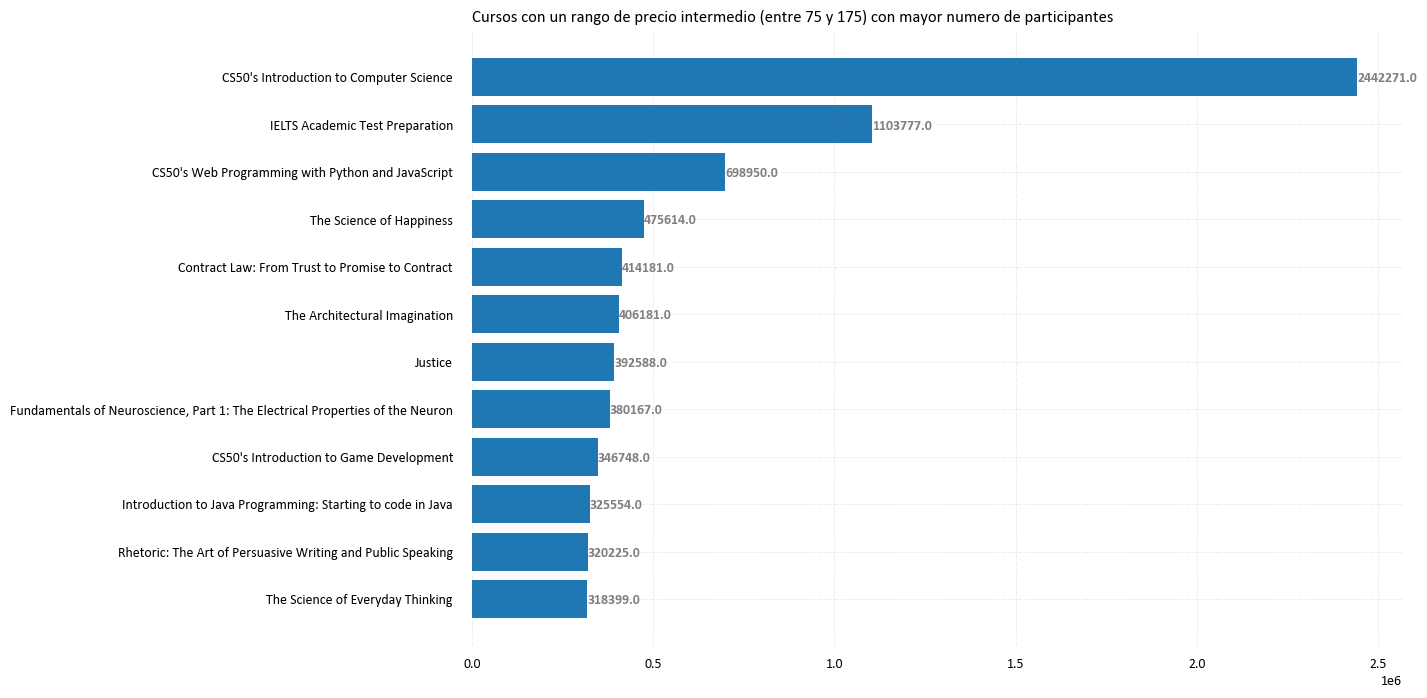

In [99]:
plt.rcParams["font.family"] = "Calibri"
name = edx_courses[(edx_courses.price > 75) & (edx_courses.price < 175)].sort_values(by=['n_enrolled'],axis=0,ascending=False).title.head(12)
rtngs = edx_courses[(edx_courses.price > 75) & (edx_courses.price < 175)].sort_values(by=['n_enrolled'],axis=0,ascending=False).n_enrolled.head(12) 
fig, ax = plt.subplots(figsize = (12, 8))
ax.barh(name,rtngs)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
     
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Cursos con un rango de precio intermedio (entre 75 y 175) con mayor numero de participantes',
             loc ='left', )
 
# Show Plot
plt.show()

C:\Users\pukeboy71\AppData\Local\Temp\ipykernel_10964\1652266136.py:19: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


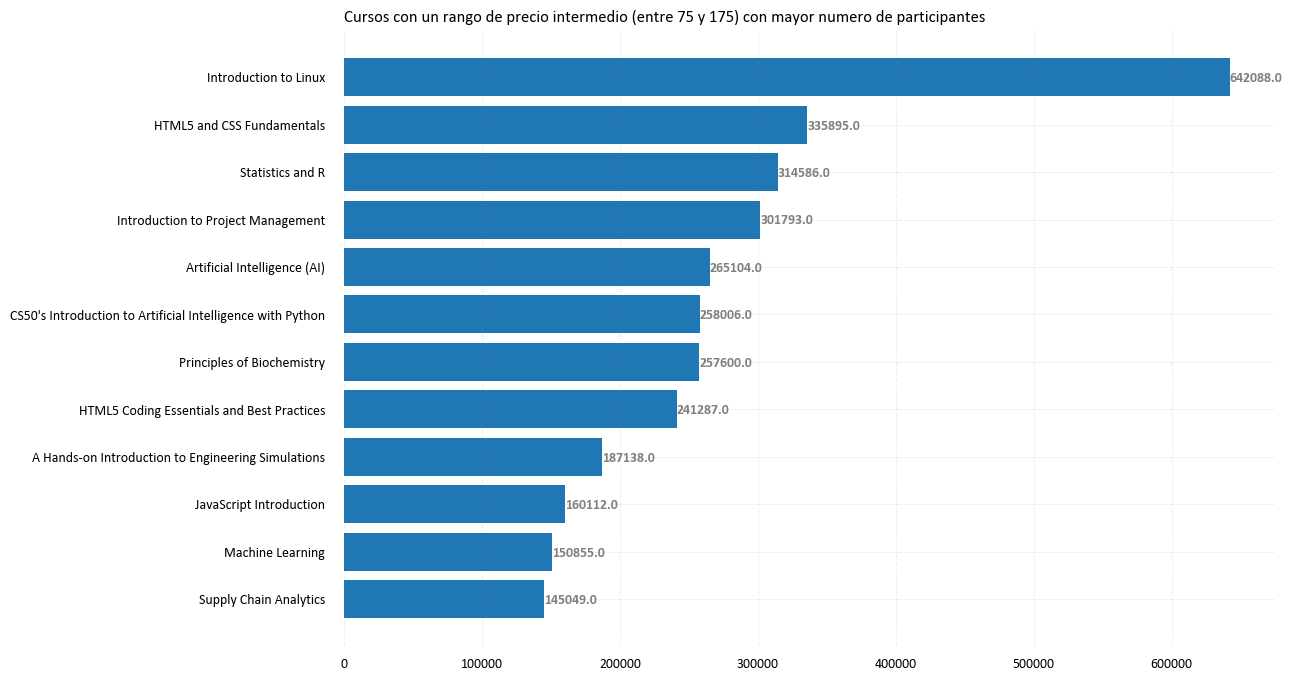

In [100]:
plt.rcParams["font.family"] = "Calibri"
name = edx_courses[(edx_courses.price > 175) & (edx_courses.price < 300)].sort_values(by=['n_enrolled'],axis=0,ascending=False).title.head(12)
rtngs = edx_courses[(edx_courses.price > 175) & (edx_courses.price < 300)].sort_values(by=['n_enrolled'],axis=0,ascending=False).n_enrolled.head(12) 
fig, ax = plt.subplots(figsize = (12, 8))
ax.barh(name,rtngs)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
     
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Cursos con un rango de precio intermedio (entre 75 y 175) con mayor numero de participantes',
             loc ='left', )
 
# Show Plot
plt.show()

Efectivamente, vemos que la razón principal por la cual esos rangos de precio son donde hay más participantes es porque ahí es donde caen los cursos más populares de la plataforma. Realizemos de nuevo el grafico donde vimos cuales precios poseian la mayor cantida de participantes, pero quitando los 5 cursos más populares de la plataforma está vez:

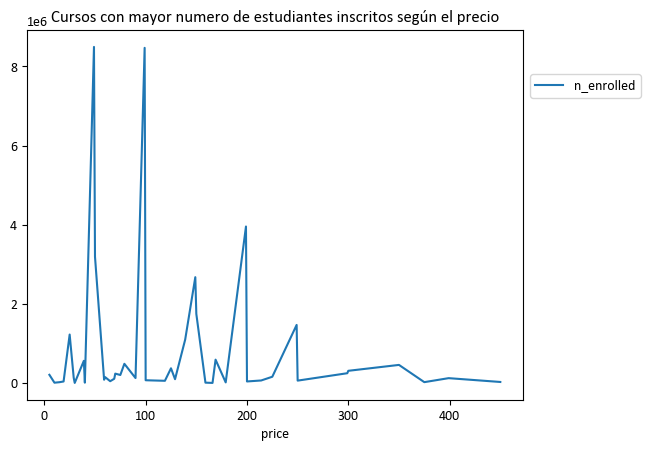

In [101]:
toptenbyprice = edx_courses.drop(edx_courses.sort_values(by='n_enrolled',ascending=False).head(10).index)
toptenbyprice.drop(edx_courses.sort_values(by='price',ascending=False)['price'].head(8).index, inplace=True)

toptenbyprice = toptenbyprice.groupby(by='price').n_enrolled.sum().sort_values(ascending=False).sort_index()
ax = toptenbyprice.plot.line(title='Cursos con mayor numero de estudiantes inscritos según el precio')
ax.legend(bbox_to_anchor=(1, 0.9), loc='upper left')

Podemos ver que seguimos teniendo la misma distribución de estudiantes, la mayor diferencia siendo que los cursos de 200$~ tienen una proporción ligeramente menor de estudiantes inscritos que en el anterior gráfico. Veamos ahora cuales lenguajes ofrece esta plataforma:

### Graficas según lenguaje en edX

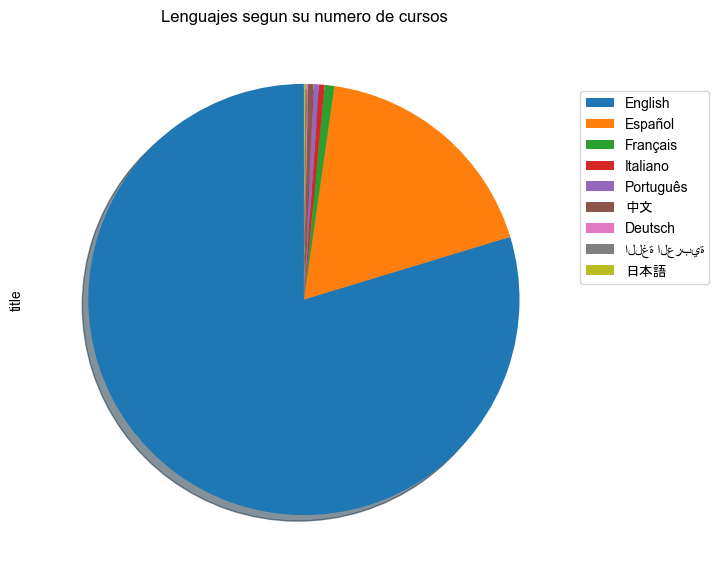

In [102]:
plt.rcParams["font.family"] = ["Arial","MS Gothic"]
toptensubjects = edx_courses.groupby(by='language').title.count().sort_values(ascending=False).head(10)
ax = toptensubjects.plot.pie(title="Lenguajes segun su numero de cursos",startangle=90,figsize=(7,7),shadow=True,labeldistance=None,legend=True)
ax.legend(bbox_to_anchor=(1, 0.9), loc='upper left')

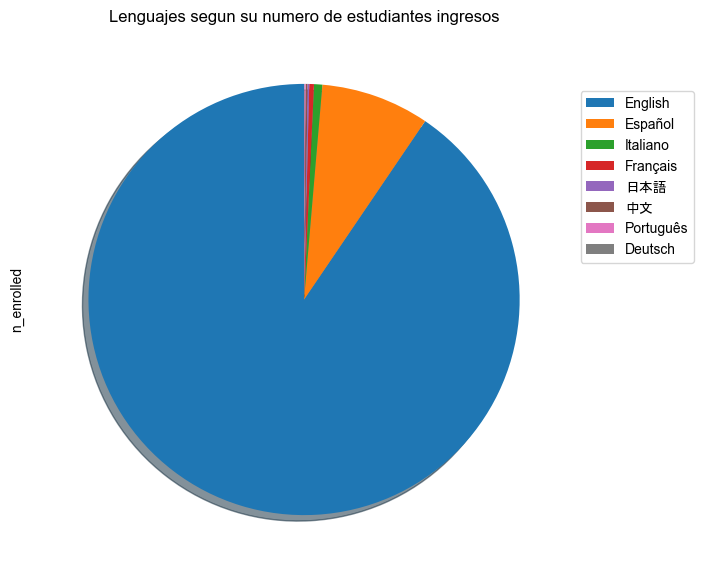

In [103]:
plt.rcParams["font.family"] = ["Arial","MS Gothic"]
toptensubjects = edx_courses.groupby(by='language').n_enrolled.sum().sort_values(ascending=False).head(10)
ax = toptensubjects.plot.pie(title="Lenguajes segun su numero de estudiantes ingresos",startangle=90,figsize=(7,7),shadow=True,labeldistance=None,legend=True)
ax.legend(bbox_to_anchor=(1, 0.9), loc='upper left')

Finalizemos con una nube de palabras de los titulos de este set de datos:

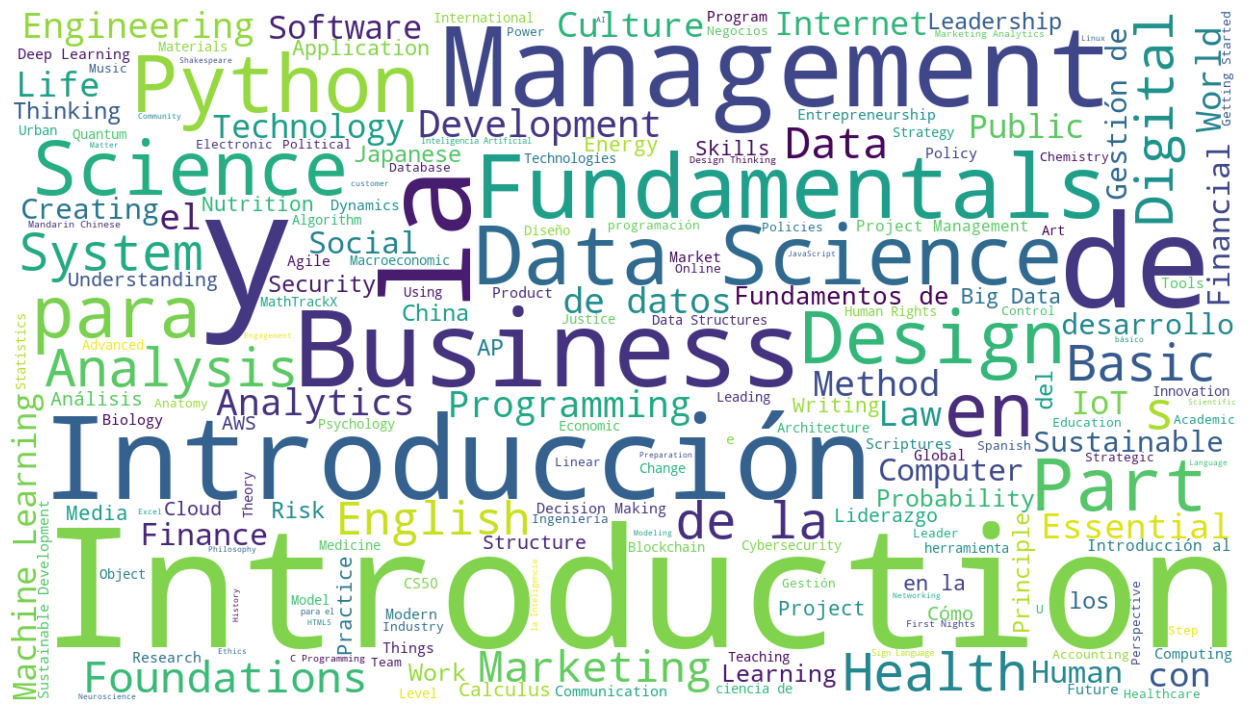

In [104]:
titles = " ".join(i for i in edx_courses.title)
stopwords = set(wordcloud.STOPWORDS)
mywordcloud = wordcloud.WordCloud(width=1280,height=720,stopwords=stopwords, background_color="white").generate(titles)
plt.figure( figsize=(16,9))
plt.imshow(mywordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Analísis de cursos en Udemy

Udemy[[2]](#2) es un proveedor de MOOCs basado en San Francisco y fundado el Mayo del 2010 por Eren Bali, un ingeniero kurdo. Teniendo como misión mejorar las vidas de personas alrededor del mundo a través del aprendizaje, ofrecen actualmente más de 213+ mil cursos en 75 idiomas, a 57+ millones de estudiantes. Yendo unicamente por los datos presentados en la pagina, es, entre los servicios analizados en este notebook, el que es utilizado por más gente y el que ofrece más cursos a la demografía más variada.

Tenemos un conjunto de datos lleno de información de los conjuntos que ofrecen llamado udemy_courses.csv, el cual vamos a analizar a continuación.

<a id="2">[2]</a> https://about.udemy.com/

In [105]:
udemy_courses.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


### Tipos de cursos en Udemy

C:\Users\pukeboy71\AppData\Local\Temp\ipykernel_10964\1494725763.py:18: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


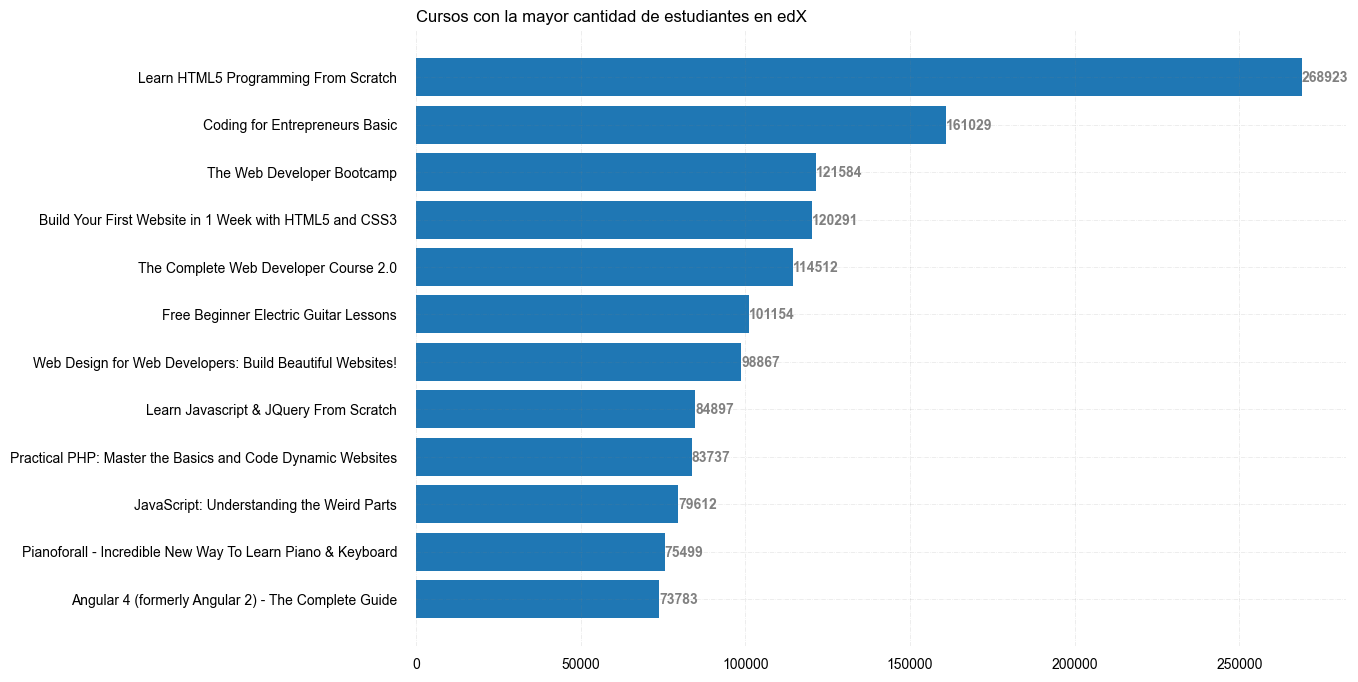

In [106]:
name = udemy_courses.sort_values(by=['num_subscribers'],axis=0,ascending=False).course_title.head(12)
rtngs = udemy_courses.sort_values(by=['num_subscribers'],axis=0,ascending=False).num_subscribers.head(12) 
fig, ax = plt.subplots(figsize = (12, 8))
ax.barh(name,rtngs)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
     
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Cursos con la mayor cantidad de estudiantes en edX',
             loc ='left', )
 
# Show Plot
plt.show()

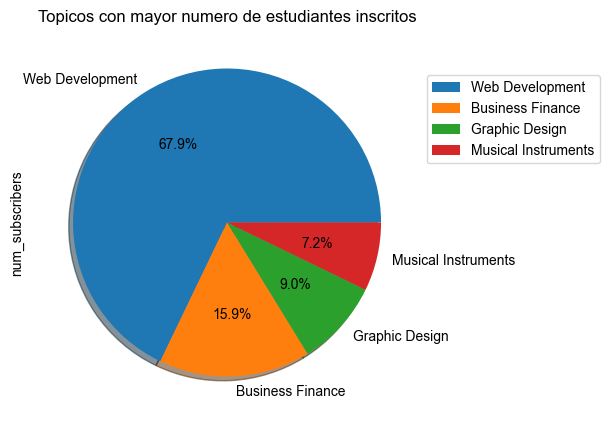

In [107]:
toptensubjects = udemy_courses.groupby(by='subject').num_subscribers.sum().sort_values(ascending=False).head(10)
ax = toptensubjects.plot.pie(title="Topicos con mayor numero de estudiantes inscritos",figsize=(10,5),shadow=True, autopct='%1.1f%%', legend=True)
ax.legend(bbox_to_anchor=(1, 0.9), loc='upper left')

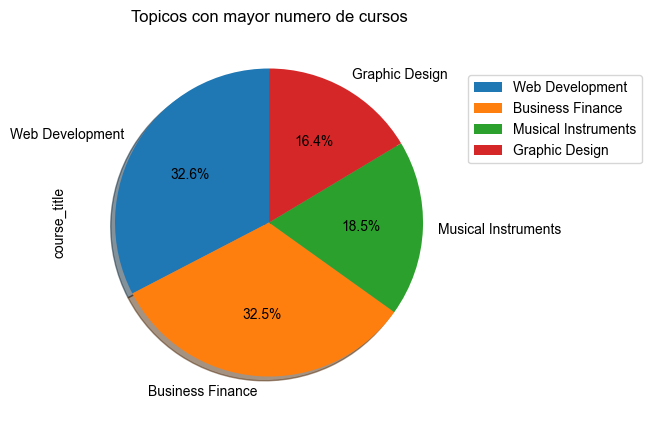

In [108]:
toptensubjects = udemy_courses.groupby(by='subject').course_title.count().sort_values(ascending=False).head(10)
ax = toptensubjects.plot.pie(title="Topicos con mayor numero de cursos",startangle=90,figsize=(10,5),shadow=True, autopct='%1.1f%%', legend=True)
ax.legend(bbox_to_anchor=(1, 0.9), loc='upper left')

### Rangos de precio más populares en Udemy

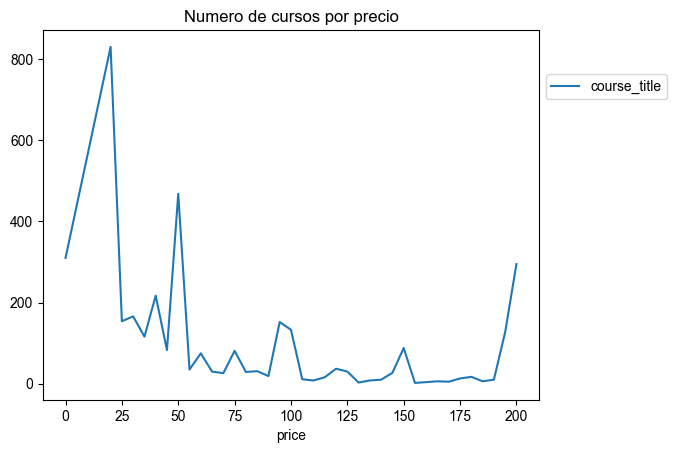

In [109]:
toptenbyprice = udemy_courses.groupby(by='price').course_title.count().sort_values(ascending=False).sort_index()
ax = toptenbyprice.plot.line(title='Numero de cursos por precio')
ax.legend(bbox_to_anchor=(1, 0.9), loc='upper left')

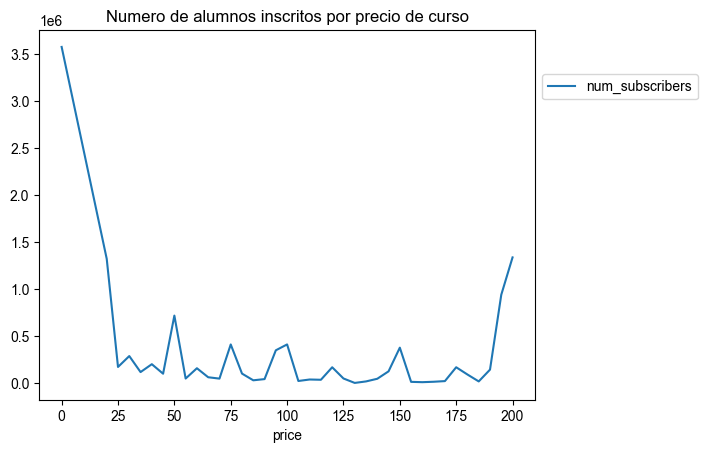

In [110]:
toptenbyprice = udemy_courses.groupby(by='price').num_subscribers.sum().sort_values(ascending=False).sort_index()
ax = toptenbyprice.plot.line(title='Numero de alumnos inscritos por precio de curso')
ax.legend(bbox_to_anchor=(1, 0.9), loc='upper left')

### Niveles de aprendizaje más populares en Udemy

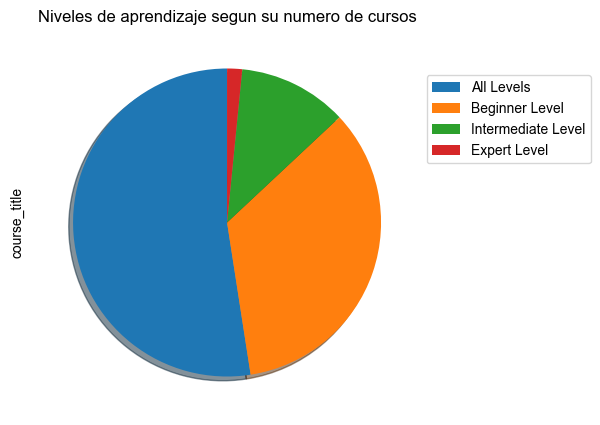

In [111]:
plt.rcParams["font.family"] = ["Arial","MS Gothic"]
toptensubjects = udemy_courses.groupby(by='level').course_title.count().sort_values(ascending=False).head(10)
ax = toptensubjects.plot.pie(title="Niveles de aprendizaje segun su numero de cursos",startangle=90,figsize=(10,5),shadow=True,labeldistance=None,legend=True)
ax.legend(bbox_to_anchor=(1, 0.9), loc='upper left')

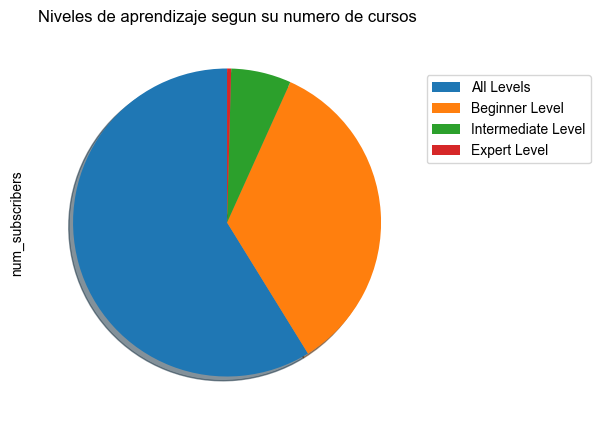

In [112]:
plt.rcParams["font.family"] = ["Arial","MS Gothic"]
toptensubjects = udemy_courses.groupby(by='level').num_subscribers.sum().sort_values(ascending=False).head(10)
ax = toptensubjects.plot.pie(title="Niveles de aprendizaje segun su numero de cursos",startangle=90,figsize=(10,5),shadow=True,labeldistance=None,legend=True)
ax.legend(bbox_to_anchor=(1, 0.9), loc='upper left')

### Nube de palabras de los titulos de Udemy

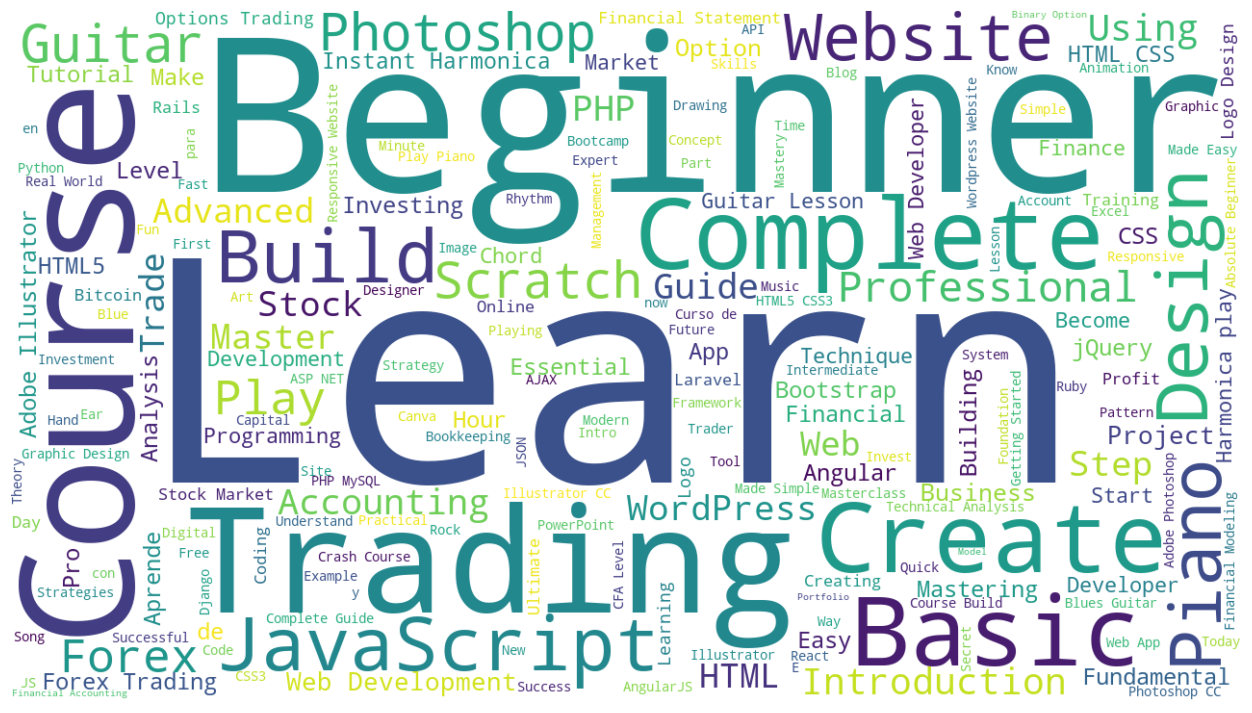

In [113]:
titles = " ".join(i for i in udemy_courses.course_title)
stopwords = set(wordcloud.STOPWORDS)
mywordcloud = wordcloud.WordCloud(width=1280,height=720,stopwords=stopwords, background_color="white").generate(titles)
plt.figure( figsize=(16,9))
plt.imshow(mywordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Udemy tiene el dataset más completo de todos los proveedores de MOOC que tenemos a nuestra disposición, así que basaremos posteriormente nuestro KPI en el.